In [1]:
import sys
import os, numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "src")))

In [2]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from weather.data_loader import load_data

In [3]:
file_path = os.path.join('..', 'data', 'processed', 'after_encoded.csv')
df_kbestmodel = load_data(file_path)

In [4]:
df_kbestmodel.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,3
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,2
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,1
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,1
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,3
5,32.0,55,3.5,26.0,2,1010.03,2,2,5.0,1,2
6,-2.0,97,8.0,86.0,2,990.87,1,3,4.0,1,4
7,3.0,85,6.0,96.0,3,984.46,1,3,3.5,1,4
8,3.0,83,6.0,66.0,2,999.44,0,3,1.0,2,4
9,28.0,74,8.5,107.0,0,1012.13,8,3,7.5,0,1


In [5]:
df_kbest_subset = df_kbestmodel.sample(300, random_state=42)

In [7]:
df_kbest_subset.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
4111,23.0,38,4.5,6.0,0,1021.19,9,0,10.0,1,1
10607,62.0,94,14.5,83.0,0,1025.57,10,2,4.0,1,1
7372,40.0,51,2.0,12.0,3,1025.15,8,1,8.0,2,1
11786,-7.0,79,6.5,90.0,2,993.56,0,3,1.5,1,4
12227,21.0,94,10.0,109.0,3,1027.71,11,1,9.0,2,1
10471,-9.0,88,12.5,79.0,2,988.76,0,3,1.0,1,4
6107,41.0,79,2.5,49.0,1,851.14,3,3,15.5,1,1
9926,15.0,90,11.0,57.0,3,1012.32,3,3,5.0,0,3
1039,0.0,46,8.0,45.0,2,1080.20,9,1,3.5,0,1
538,-9.0,94,0.0,56.0,2,987.75,1,3,3.5,2,4


In [8]:
df_kbest_subset.dtypes

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover               int64
Atmospheric Pressure    float64
UV Index                  int64
Season                    int64
Visibility (km)         float64
Location                  int64
Weather Type              int64
dtype: object

In [10]:
X = df_kbest_subset.drop(columns=['Weather Type'])
y = df_kbest_subset['Weather Type']    

In [12]:
selector = SelectKBest(score_func=mutual_info_classif, k=5)
selector.fit(X, y)

selected_features = X.columns[selector.get_support()]
print("Fitur terpilih:", selected_features)

Fitur terpilih: Index(['Temperature', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index',
       'Visibility (km)'],
      dtype='object')


In [14]:
X_new = selector.transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [16]:
decision_model = DecisionTreeClassifier(random_state=42)
decision_model.fit(X_train, y_train)

# Prediksi
y_pred_dt = decision_model.predict(X_test)

# Evaluasi
print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)

class_labels = ['Sunny (1)', 'Cloudy (2)', 'Rainy (3)', 'Snowy (4)']

cm_df_dt = pd.DataFrame(cm_dt, index=class_labels, columns=class_labels)

print("\nConfusion Matrix (dengan label):")
print(cm_df_dt)


for i, row in enumerate(cm_dt):
    actual_class = class_labels[i]
    total = np.sum(row)
    print(f"\nBaris {i+1} ({actual_class}):")
    for j, val in enumerate(row):
        predicted_class = class_labels[j]
        if i == j:
            print(f"  - {val} diklasifikasikan **BENAR** sebagai {predicted_class}")
        else:
            print(f"  - {val} diklasifikasikan **SALAH** sebagai {predicted_class}")
    print(f"  → Total data aktual kelas ini: {total}")

Decision Tree Performance:
Accuracy: 0.8166666666666667
[[13  2  0  0]
 [ 2  7  1  0]
 [ 2  2 11  0]
 [ 2  0  0 18]]
              precision    recall  f1-score   support

           1       0.68      0.87      0.76        15
           2       0.64      0.70      0.67        10
           3       0.92      0.73      0.81        15
           4       1.00      0.90      0.95        20

    accuracy                           0.82        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.84      0.82      0.82        60


Confusion Matrix (dengan label):
            Sunny (1)  Cloudy (2)  Rainy (3)  Snowy (4)
Sunny (1)          13           2          0          0
Cloudy (2)          2           7          1          0
Rainy (3)           2           2         11          0
Snowy (4)           2           0          0         18

Baris 1 (Sunny (1)):
  - 13 diklasifikasikan **BENAR** sebagai Sunny (1)
  - 2 diklasifikasikan **SALAH** sebagai Cloudy (2)
  - 0 di

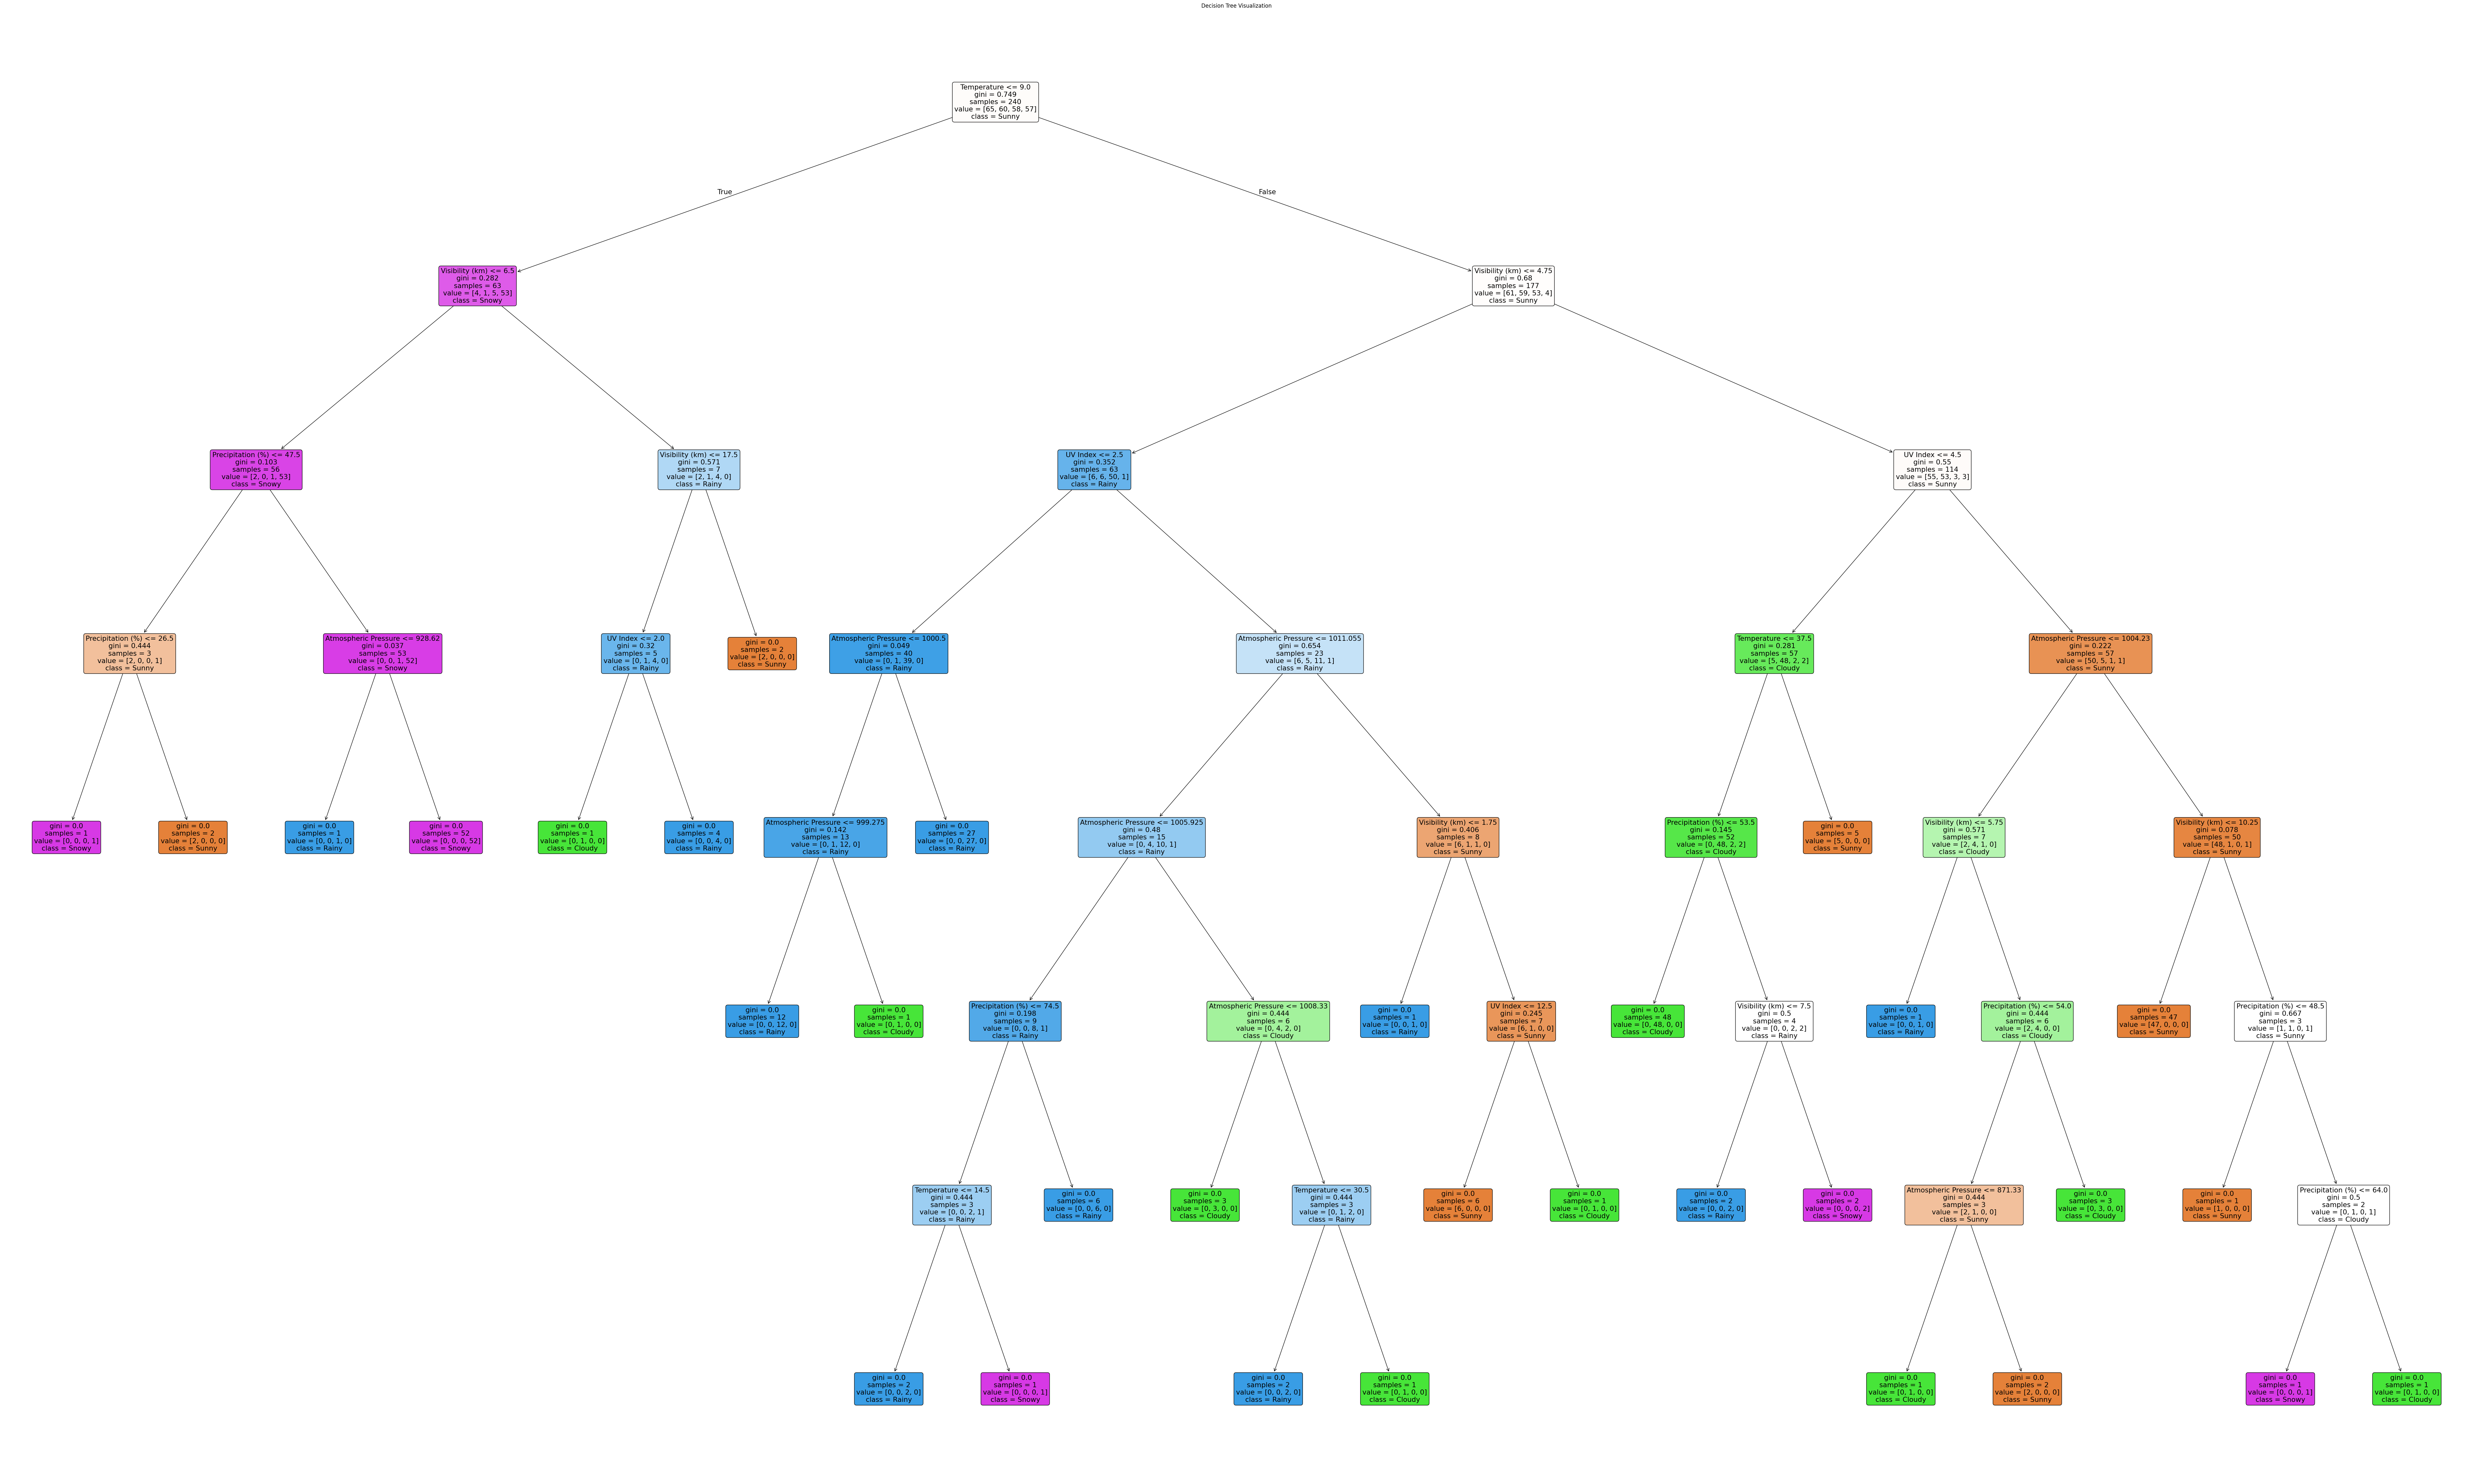

In [17]:
plt.figure(figsize=(100, 60))
plot_tree(decision_model, 
          feature_names=selected_features, 
          class_names=["Sunny", "Cloudy", "Rainy", "Snowy"],  
          filled=True, 
          rounded=True, 
          max_depth=None)
plt.title("Decision Tree Visualization")
plt.show()
# plt.savefig("decision_tree_large.png", dpi=400, bbox_inches='tight')
plt.close()

In [19]:
tree_dt_rules = export_text(decision_model, feature_names=list(selected_features))
print(tree_dt_rules)

|--- Temperature <= 9.00
|   |--- Visibility (km) <= 6.50
|   |   |--- Precipitation (%) <= 47.50
|   |   |   |--- Precipitation (%) <= 26.50
|   |   |   |   |--- class: 4
|   |   |   |--- Precipitation (%) >  26.50
|   |   |   |   |--- class: 1
|   |   |--- Precipitation (%) >  47.50
|   |   |   |--- Atmospheric Pressure <= 928.62
|   |   |   |   |--- class: 3
|   |   |   |--- Atmospheric Pressure >  928.62
|   |   |   |   |--- class: 4
|   |--- Visibility (km) >  6.50
|   |   |--- Visibility (km) <= 17.50
|   |   |   |--- UV Index <= 2.00
|   |   |   |   |--- class: 2
|   |   |   |--- UV Index >  2.00
|   |   |   |   |--- class: 3
|   |   |--- Visibility (km) >  17.50
|   |   |   |--- class: 1
|--- Temperature >  9.00
|   |--- Visibility (km) <= 4.75
|   |   |--- UV Index <= 2.50
|   |   |   |--- Atmospheric Pressure <= 1000.50
|   |   |   |   |--- Atmospheric Pressure <= 999.28
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- Atmospheric Pressure >  999.28
|   |   |   |   |   

In [18]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test)

# Evaluasi
print("Random Forest Performance:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

cm_rand = confusion_matrix(y_test, y_pred_dt)

class_labels = ['Sunny (1)', 'Cloudy (2)', 'Rainy (3)', 'Snowy (4)']

cm_df_rand = pd.DataFrame(cm_rand, index=class_labels, columns=class_labels)

print("\nConfusion Matrix (dengan label):")
print(cm_df_rand)


for i, row in enumerate(cm_rand):
    actual_class = class_labels[i]
    total = np.sum(row)
    print(f"\nBaris {i+1} ({actual_class}):")
    for j, val in enumerate(row):
        predicted_class = class_labels[j]
        if i == j:
            print(f"  - {val} diklasifikasikan **BENAR** sebagai {predicted_class}")
        else:
            print(f"  - {val} diklasifikasikan **SALAH** sebagai {predicted_class}")
    print(f"  → Total data aktual kelas ini: {total}")

Random Forest Performance:
[[14  1  0  0]
 [ 3  7  0  0]
 [ 2  0 13  0]
 [ 2  0  0 18]]
              precision    recall  f1-score   support

           1       0.67      0.93      0.78        15
           2       0.88      0.70      0.78        10
           3       1.00      0.87      0.93        15
           4       1.00      0.90      0.95        20

    accuracy                           0.87        60
   macro avg       0.89      0.85      0.86        60
weighted avg       0.90      0.87      0.87        60


Confusion Matrix (dengan label):
            Sunny (1)  Cloudy (2)  Rainy (3)  Snowy (4)
Sunny (1)          13           2          0          0
Cloudy (2)          2           7          1          0
Rainy (3)           2           2         11          0
Snowy (4)           2           0          0         18

Baris 1 (Sunny (1)):
  - 13 diklasifikasikan **BENAR** sebagai Sunny (1)
  - 2 diklasifikasikan **SALAH** sebagai Cloudy (2)
  - 0 diklasifikasikan **SALAH** seba

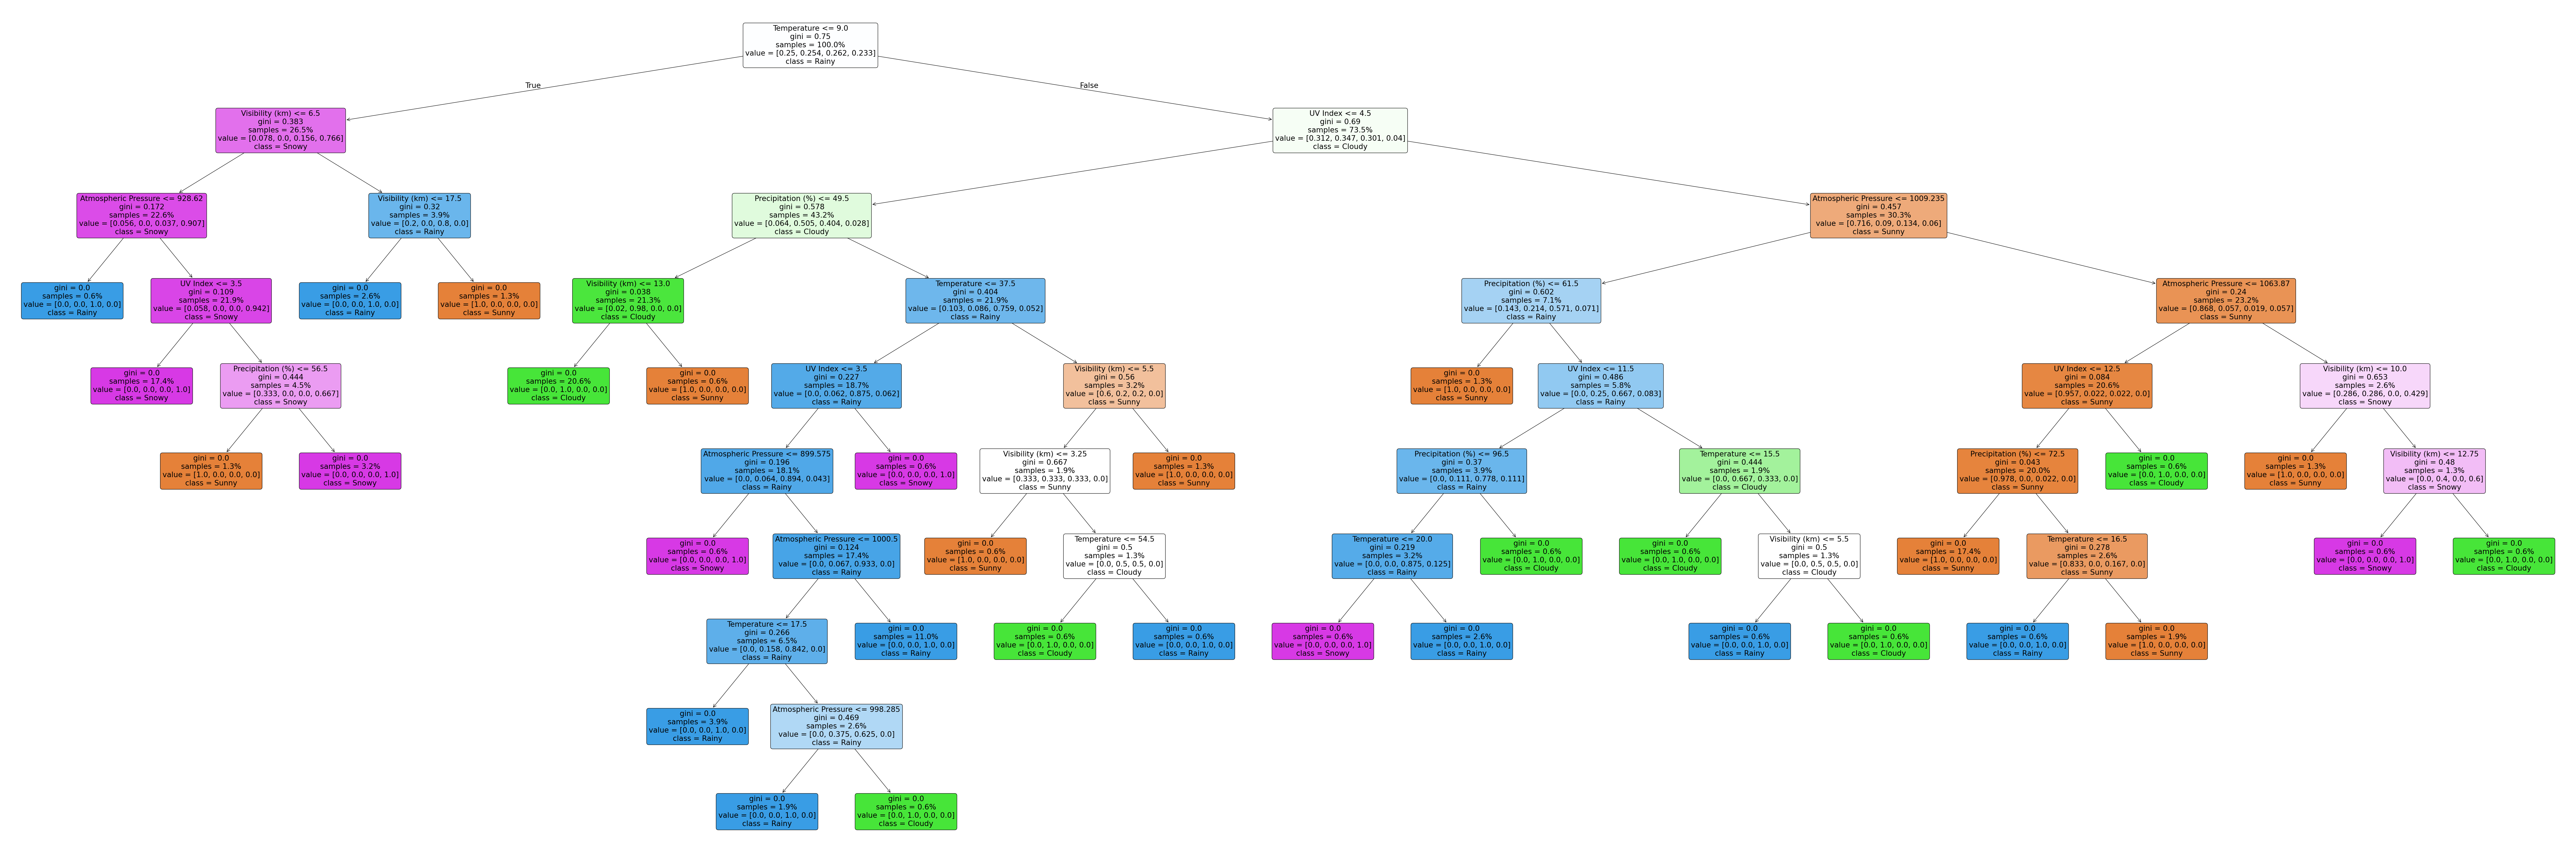

In [ ]:
estimator = rf_model.estimators_[0]

plt.figure(figsize=(120, 40))
plot_tree(
    estimator,  
    feature_names=selected_features, 
    class_names=["Sunny", "Cloudy", "Rainy", "Snowy"],  
    filled=True,
    rounded=True,
    max_depth=None,       
    proportion=True,
    impurity=True
)
plt.show()
plt.title("Random Forest Visualization")
plt.close()

In [25]:
output_file_path = os.path.join('..', 'data', 'result_visual', 'rf_rules.txt')

with open(output_file_path, "w") as f:
    for i, tree_in_forest in enumerate(rf_model.estimators_):
        f.write(f"\nAturan untuk Pohon Ke-{i+1}:\n")
        tree_rules = export_text(tree_in_forest, feature_names=list(selected_features))
        f.write(tree_rules + "\n")